In [ ]:
# default_exp transforms.fractal

In [ ]:
%load_ext lab_black
%load_ext autoreload
%autoreload 2

In [ ]:
# export
import numpy as np

from albumentations.core.transforms_interface import ImageOnlyTransform

from PIL import Image

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
# export
class MandelBrotFractalTransform(ImageOnlyTransform):
    def __init__(
        self,
        n_iter: int = 10,
        deg: int = 2,
        delta: float = 0.01,
        always_apply: bool = False,
        p: float = 1.0,
    ):
        super(MandelBrotFractalTransform, self).__init__(always_apply, p)
        self.n_iter = n_iter
        self.deg = deg
        self.delta = delta
        self.F = lambda z, c, deg: np.power(z, deg) + c

    def apply(self, image, **params):
        image = Image.fromarray(image)
        if self.deg == 2:
            x_min, x_max = -2.0, 0.6
            y_min, y_max = -1.2, 1.2
        else:
            x_min, x_max = -2.5, 2
            y_min, y_max = -1.5, 1.5

        delta = self.delta

        re, im = np.mgrid[x_min:x_max:delta, y_min:y_max:delta]

        c = (re + 1j * im).T
        x0 = np.zeros_like(c)  # x0 = 0
        x = x0

        btmleft = (-0.5, -0.5)
        topright = (0.5, 0.5)
        trap_size = (1.0, 1.0)

        fractal = np.zeros((*(np.abs(c).shape), 3))
        trapped = np.zeros_like(np.abs(c))

        with np.nditer(x, flags=["multi_index"], op_flags=["readwrite"]) as it:
            for point in it:
                for iter in range(self.n_iter):
                    point[...] = self.F(point, c[it.multi_index], self.deg)

                    # if this point was trapped previously then break
                    if (abs(point) > 10) or trapped[it.multi_index] == 1:
                        break

                    # check if this point can be trapped
                    if (point.real > btmleft[0] and point.real < topright[0]) and (
                        point.imag > btmleft[1] and point.imag < topright[1]
                    ):
                        trapped[it.multi_index] = 1
                        fractal[it.multi_index] = np.array(
                            image.getpixel(
                                (
                                    int((point.real + 0.5) * image.width),
                                    int((point.imag + 0.5) * image.height),
                                )
                            )
                        )

        return fractal.astype(np.uint8)

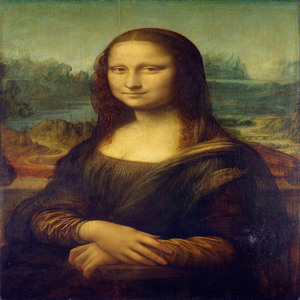

In [ ]:
img = Image.open("images/mona.jpg")
img.resize((300, 300))

In [ ]:
fractal_trans = MandelBrotFractalTransform(deg=2, delta=0.02)

In [ ]:
trans_img = fractal_trans(image=np.array(img))["image"]

In [ ]:
trans_img.shape

(120, 130, 3)

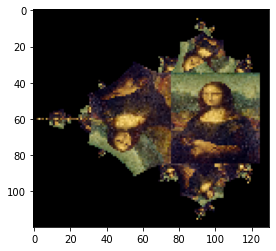

In [ ]:
plt.imshow(trans_img)

In [ ]:
# export
class JuliaFractalTransform(ImageOnlyTransform):
    def __init__(
        self,
        n_iter: int = 10,
        deg: int = 2,
        delta: float = 0.01,
        always_apply: bool = False,
        p: float = 1.0,
    ):
        super(JuliaFractalTransform, self).__init__(always_apply, p)

        self.n_iter = n_iter
        self.deg = deg
        self.delta = delta

        self.F = lambda z, c, deg: np.power(z, deg) + c

    def apply(self, image, **params):
        image = Image.fromarray(image)

        if self.deg == 2:
            x_min, x_max = -1.2, 1.2
            y_min, y_max = -1.2, 1.2
        else:
            x_min, x_max = -1.5, 1.5
            y_min, y_max = -1.5, 1.5

        delta = self.delta

        re, im = np.mgrid[x_min:x_max:delta, y_min:y_max:delta]

        grid = (re + 1j * im).T
        x = grid

        c = np.zeros_like(x)
        c.fill(0.3 + 0.6j)

        btmleft = (-0.5, -0.5)
        topright = (0.5, 0.5)
        trap_size = (1.0, 1.0)

        fractal = np.zeros((*(np.abs(c).shape), 3))
        trapped = np.zeros_like(np.abs(c))

        with np.nditer(x, flags=["multi_index"], op_flags=["readwrite"]) as it:
            for point in it:
                for iter in range(self.n_iter):
                    point[...] = self.F(point, c[it.multi_index], self.deg)

                    # if this point was trapped previously then break
                    if (abs(point) > 10) or trapped[it.multi_index] == 1:
                        break

                    # check if this point can be trapped
                    if (point.real > btmleft[0] and point.real < topright[0]) and (
                        point.imag > btmleft[1] and point.imag < topright[1]
                    ):
                        trapped[it.multi_index] = 1
                        pixel = (
                            int((point.real + 0.5) * (image.width - 1)),
                            int((point.imag + 0.5) * (image.height - 1)),
                        )
                        try:
                            fractal[it.multi_index] = np.array(image.getpixel(pixel))
                        except:
                            print(
                                f"ERROR: pixel: ({int( ( point.real + 0.5 ) * image.width )}, {int( ( point.imag + 0.5 ) * image.height  )}), point: ({point})"
                            )

        return fractal.astype(np.uint8)

In [ ]:
fractal_trans = JuliaFractalTransform(deg=2, delta=0.02)

In [ ]:
trans_img = fractal_trans(image=np.array(img))["image"]

In [ ]:
trans_img.shape

(120, 120, 3)

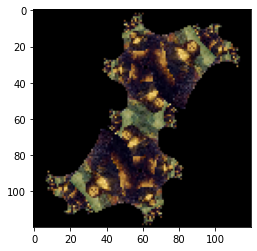

In [ ]:
plt.imshow(trans_img)

In [ ]:
from nbdev.export import notebook2script

notebook2script()

Converted 01_model.dummy.ipynb.
Converted 01a_model.resnet18.ipynb.
Converted 02_transforms.fractal.ipynb.
Converted 0a_data.cifar.ipynb.
Converted dev_setup.ipynb.
Converted index.ipynb.
